In [1]:
import numpy as np
from ppopt.mpmodel import MPModeler, VariableType
from ppopt.mp_solvers.solve_mpmiqp import solve_mpmiqp_enumeration, mpmiqp_algorithm, solve_mpmiqp
from ppopt.plot import parametric_plot

In [2]:
m = MPModeler()

u = m.add_var(name='u')
x = m.add_var(name='x')
z = m.add_var(name='z')
t1 = m.add_var(name='t1')
t2 = m.add_var(name='t2')
mu = m.add_var(name='mu')
s1 = m.add_var(name='s1')
s2 = m.add_var(name='s2')
s3 = m.add_var(name='s3')
l1 = m.add_var(name='l1')
l2 = m.add_var(name='l2')
l3 = m.add_var(name='l3')
p1 = m.add_var(name='p1', vtype=VariableType.binary)
p2 = m.add_var(name='p2', vtype=VariableType.binary)
p3 = m.add_var(name='p3', vtype=VariableType.binary)

d1 = m.add_param(name='d1')
d2 = m.add_param(name='d2')

In [3]:
m.add_constr(-2*x + 3*z -t1 == 50 -d2)
m.add_constr(-s1 -x +z/2 +t1/2 -t2/2 + u == 25 +d1 -7*d2/2)
m.add_constr(-s2 +2*x -2*z +4*t1/3 +t2 +u == 151/3 +2*d2)
m.add_constr(s3 -x + 5*z/2 +t1/2 -t2 -u == 26 +d1 -d2/2)
m.add_constr(l1 + l2 + l3 == 1)
m.add_constr(2*mu + l1 - 2*l2 - l3 == 100)
m.add_constr(3*mu + l1/2 - 2*l2 - 5*l3/2 == 150)
m.add_constr(l1 - p1 <= 0)
m.add_constr(l2 - p2 <= 0)
m.add_constr(l3 - p3 <= 0)
m.add_constr(s1 + 1000*p1 <= 1000)
m.add_constr(s2 + 1000*p2 <= 1000)
m.add_constr(s3 + 1000*p3 <= 1000)
m.add_constr(p1 + p2 + p3 <= 2)
m.add_constr(0 <= t1)
m.add_constr(t1 <= 4)
m.add_constr(0 <= t2)
m.add_constr(t2 <= 4)
m.add_constr(0 <= d1)
m.add_constr(d1 <= 5)
m.add_constr(0 <= d2)
m.add_constr(d2 <= 5)
m.add_constr(0 <= x)
m.add_constr(0 <= z)
m.add_constr(0 <= u)
m.add_constr(0 <= mu)
m.add_constr(0 <= l1)
m.add_constr(0 <= l2)
m.add_constr(0 <= l3)
m.add_constr(0 <= s1)
m.add_constr(0 <= s2)
m.add_constr(0 <= s3)

In [4]:
m.set_objective(-u + 50)

In [5]:
prob = m.formulate_problem()
prob.process_constraints()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-12-20


In [6]:
solution_milp = solve_mpmiqp(prob, mpmiqp_algorithm.enumerate)

In [7]:
regions_list = solution_milp.critical_regions

In [8]:
len(regions_list)

10

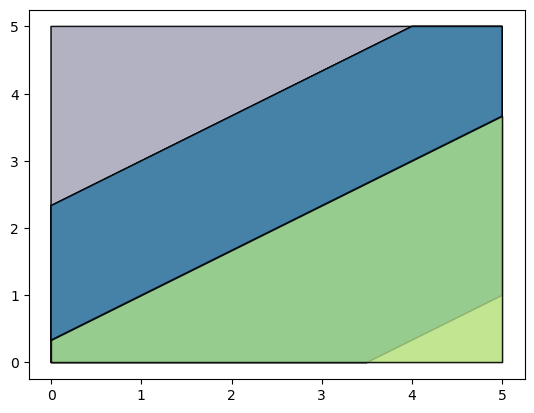

In [9]:
parametric_plot(solution_milp)

In [10]:
regions_list

[Critical region with active set [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12]
 The Omega Constraint indices are [0, 1, 2, 3]
 The Lagrange multipliers Constraint indices are []
 The Regular Constraint indices are [[2], [14]]
   x(θ) = Aθ + b 
  λ(θ) = Cθ + d 
   Eθ <= f
  A = [[-5.00000000e-01  5.00000000e-01]
  [ 7.50000000e-01  1.25000000e+00]
  [ 5.00000000e-01  5.00000000e-01]
  [-1.21902590e-16  1.22582783e-16]
  [-3.50742928e-16  3.74668703e-16]
  [-1.74454782e-16 -1.30247754e-16]
  [-2.00000000e+00  3.00000000e+00]
  [ 7.34653046e-17 -3.66747160e-16]
  [-2.39741232e-16  2.18479189e-16]
  [-4.97347624e-19 -5.03364366e-18]
  [-2.55494427e-16  7.06023897e-17]
  [-2.42473920e-17  8.67179982e-17]] 
  b = [[5.51000000e+02]
  [7.95000000e+02]
  [5.48000000e+02]
  [4.00000000e+00]
  [4.11483970e-14]
  [5.07500000e+01]
  [7.00000000e+00]
  [1.00000000e+03]
  [5.72974421e-14]
  [4.02533943e-14]
  [5.00000000e-01]
  [5.00000000e-01]] 
  C = [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 

In [11]:
regions_list[0].A[0,:]

array([-0.5,  0.5])

In [20]:
A_plot = np.hstack([regions_list[1].A[0,:].T, regions_list[0].b[0]])

In [21]:
A_plot

array([-5.00e-01,  5.00e-01,  5.51e+02])